# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import numpy as np
import pandas as pd
import pvlib
import pytz
import folium
import geopy.distance
from dotenv import load_dotenv
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
load_dotenv()
NREL_API_KEY = os.getenv("NREL_API_KEY")
NREL_API_EMAIL = os.getenv("NREL_API_EMAIL")

In [3]:
import sys

sys.path.append("/Users/andrebach/code/solmap")
%load_ext autoreload
%autoreload 2

In [4]:
import data_generation

In [5]:
%config InlineBackend.figure_format='retina'

# Run it

In [6]:
congressional_summary_df = data_generation.geometry.load_congresional_district_points(
    file_to_load="congressional_geometry_v3.csv",
)

In [7]:
generation_df = data_generation.solar.generate_values_at_points(
    congressional_summary_df
)

i=0
Cache miss at 30.8, -87.8: computing from scratch.
Wrote solar_local_cache/solar_weather_lat30.8_lon-87.8.csv
Wrote solar_local_cache/pv_lat30.8_lon-87.8.csv
Cache miss at 35.9, -112.4: computing from scratch.
Wrote solar_local_cache/solar_weather_lat35.9_lon-112.4.csv
Wrote solar_local_cache/pv_lat35.9_lon-112.4.csv
Cache miss at 34.5, -120.2: computing from scratch.
Wrote solar_local_cache/solar_weather_lat34.5_lon-120.2.csv
Wrote solar_local_cache/pv_lat34.5_lon-120.2.csv
Cache miss at 34.1, -118.7: computing from scratch.
Wrote solar_local_cache/solar_weather_lat34.1_lon-118.7.csv
Wrote solar_local_cache/pv_lat34.1_lon-118.7.csv
Cache miss at 25.0, -80.9: computing from scratch.
Wrote solar_local_cache/solar_weather_lat25.0_lon-80.9.csv
Wrote solar_local_cache/pv_lat25.0_lon-80.9.csv
Cache miss at 36.5, -99.6: computing from scratch.
Wrote solar_local_cache/solar_weather_lat36.5_lon-99.6.csv
Wrote solar_local_cache/pv_lat36.5_lon-99.6.csv
Cache miss at 33.8, -93.0: computing fr

In [14]:
# El Paso, Texas
lat_texas = 32.1
lon_texas = -110.3
# NYC, NY
lat_ny = 40.8
lon_ny = -73.9
# Seattle, Washinton
lat_wash = 47.5
lon_wash = -122.4

In [15]:
generation_df_texas = data_generation.solar.simulate_for_constant_clouds(
    lat_texas,
    lon_texas,
    congressional_summary_df,
    pv_array_tilt=None,
)
generation_df_ny = data_generation.solar.simulate_for_constant_clouds(
    lat_ny,
    lon_ny,
    congressional_summary_df,
    pv_array_tilt=None,
)
generation_df_wash = data_generation.solar.simulate_for_constant_clouds(
    lat_wash,
    lon_wash,
    congressional_summary_df,
    pv_array_tilt=None,
)

i=0
i=100
Cache miss at 33.2, -97.1: computing from scratch.
i=200
i=300
i=400
Saved to output_csv/generation_clouds_matching_lat32.1_lon-110.3_tilt32.1_2024_11_20T14_45_02_793223.csv
i=0
i=100
i=200
i=300
i=400
Saved to output_csv/generation_clouds_matching_lat40.8_lon-73.9_tilt40.8_2024_11_20T14_45_57_156239.csv
i=0
i=100
i=200
i=300
i=400
Saved to output_csv/generation_clouds_matching_lat47.5_lon-122.4_tilt47.5_2024_11_20T14_46_50_795731.csv


In [16]:
generation_df_horizontal = data_generation.solar.generate_values_at_points(
    congressional_summary_df,
    pv_array_tilt=0,
)
generation_df_texas_horizontal = data_generation.solar.simulate_for_constant_clouds(
    lat_texas,
    lon_texas,
    congressional_summary_df,
    pv_array_tilt=0,
)
generation_df_ny_horizontal = data_generation.solar.simulate_for_constant_clouds(
    lat_ny,
    lon_ny,
    congressional_summary_df,
    pv_array_tilt=0,
)
generation_df_wash_horizontal = data_generation.solar.simulate_for_constant_clouds(
    lat_wash,
    lon_wash,
    congressional_summary_df,
    pv_array_tilt=0,
)

i=0
i=100
i=200
i=300
i=400
Saved to output_csv/generation_2024_11_20T14_47_44_190508.csv
i=0
i=100
i=200
i=300
i=400
Saved to output_csv/generation_clouds_matching_lat32.1_lon-110.3_tilt0_2024_11_20T14_48_38_707202.csv
i=0
i=100
i=200
i=300
i=400
Saved to output_csv/generation_clouds_matching_lat40.8_lon-73.9_tilt0_2024_11_20T14_49_32_955748.csv
i=0
i=100
i=200
i=300
i=400
Saved to output_csv/generation_clouds_matching_lat47.5_lon-122.4_tilt0_2024_11_20T14_50_27_829844.csv


In [17]:
df = generation_df_wash_horizontal
ncolors = 20
palette = sns.color_palette("flare_r", ncolors)
hex_colors = palette.as_hex()
vmin = 140
vmax = 285
# vmin = df.generation.min()
# vmax = df.generation.max()
vrange = vmax - vmin
df["color"] = df.generation.apply(
    lambda x: hex_colors[int((ncolors - 1) * (x - vmin) / vrange)]
)
m = folium.Map(
    location=(df.lat.mean(), df.lon.mean()),
    zoom_start=4,
    height=650,
    width=1083,
)
# folium.TileLayer('cartodbdark_matter').add_to(m)
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row.lat, row.lon],
        fill=True,
        stroke=False,
        fill_opacity=0.8,
        radius=7,
        color=row.color,
        tooltip=f"{row.geometry_name}, {row.generation:0.1f}",
        popup=f"{row.geometry_name}, {row.generation:0.1f}, {row.lat}, {row.lon}",
    ).add_to(m)
m

In [18]:
data_generation.solar.save_as_geojson(
    congressional_summary_df,
    {
        "generation_real": generation_df,
        "generation_texas_clouds": generation_df_texas,
        "generation_ny_clouds": generation_df_ny,
        "generation_wash_clouds": generation_df_wash,
        "generation_real_horizontal": generation_df_horizontal,
        "generation_texas_clouds_horizontal": generation_df_texas_horizontal,
        "generation_ny_clouds_horizontal": generation_df_ny_horizontal,
        "generation_wash_clouds_horizontal": generation_df_wash_horizontal,
    },
)

Missing values for 57 geos, continuing.
Saved to output_json/solar_points_2024_11_20T14_50_28_967233.json


True

Werote output_csv/timeseries_lat32.1_lon-110.3.csv
Werote output_csv/timeseries_lat47.5_lon-122.4.csv
Werote output_csv/timeseries_lat40.8_lon-73.9.csv


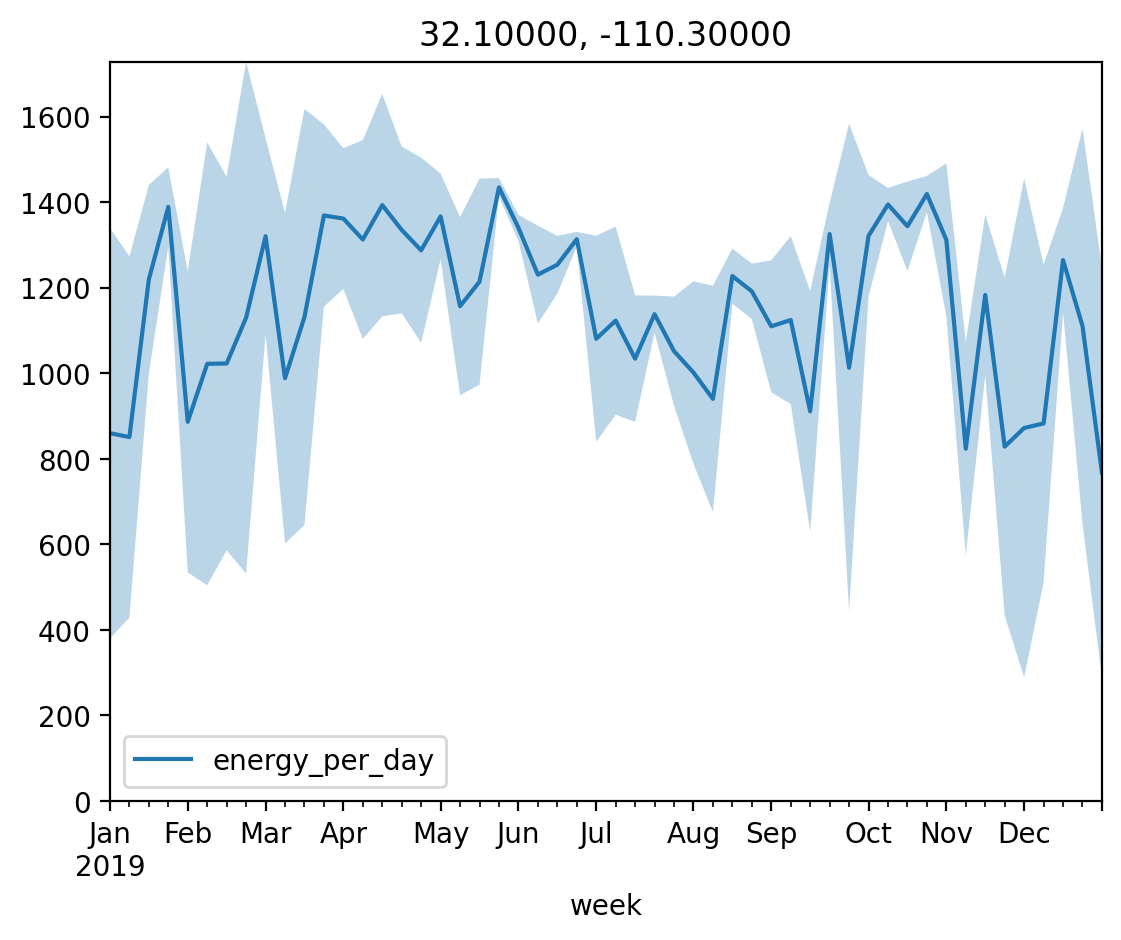

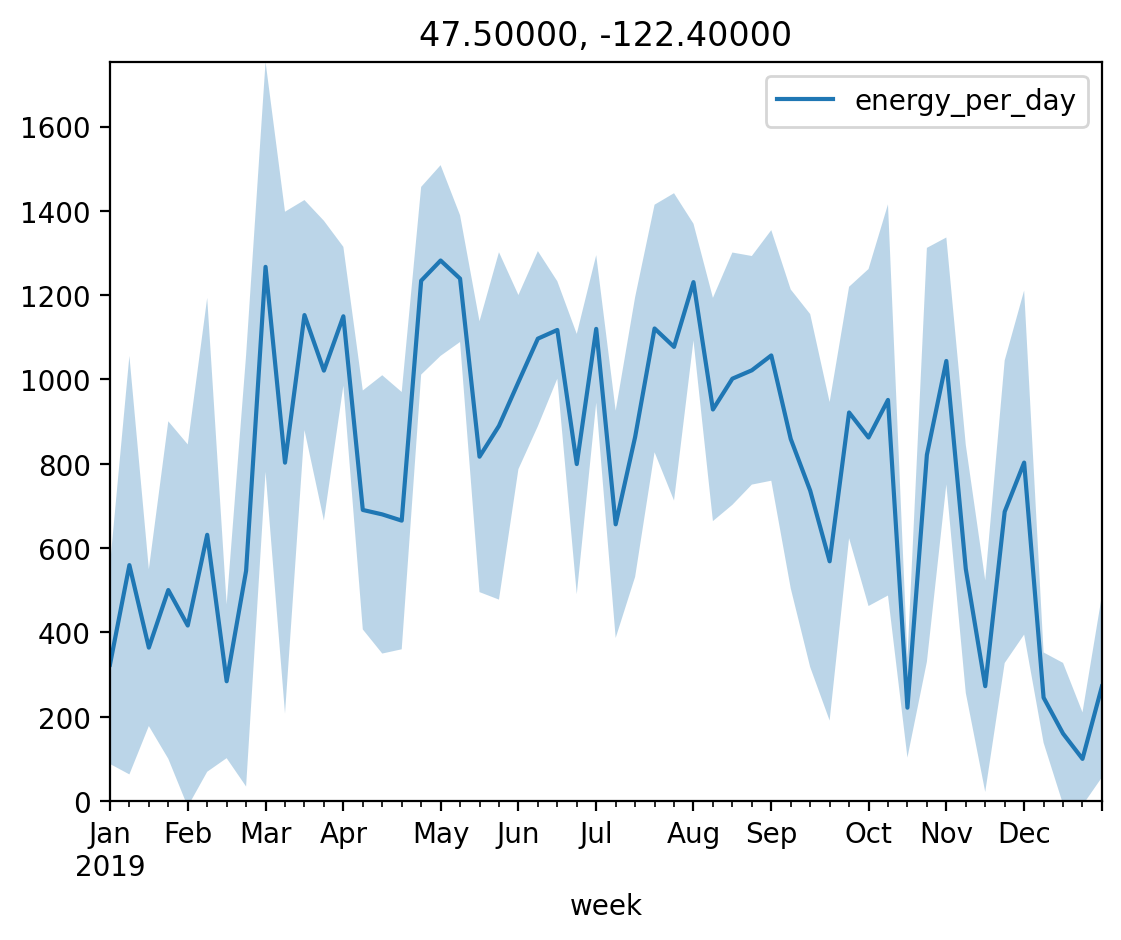

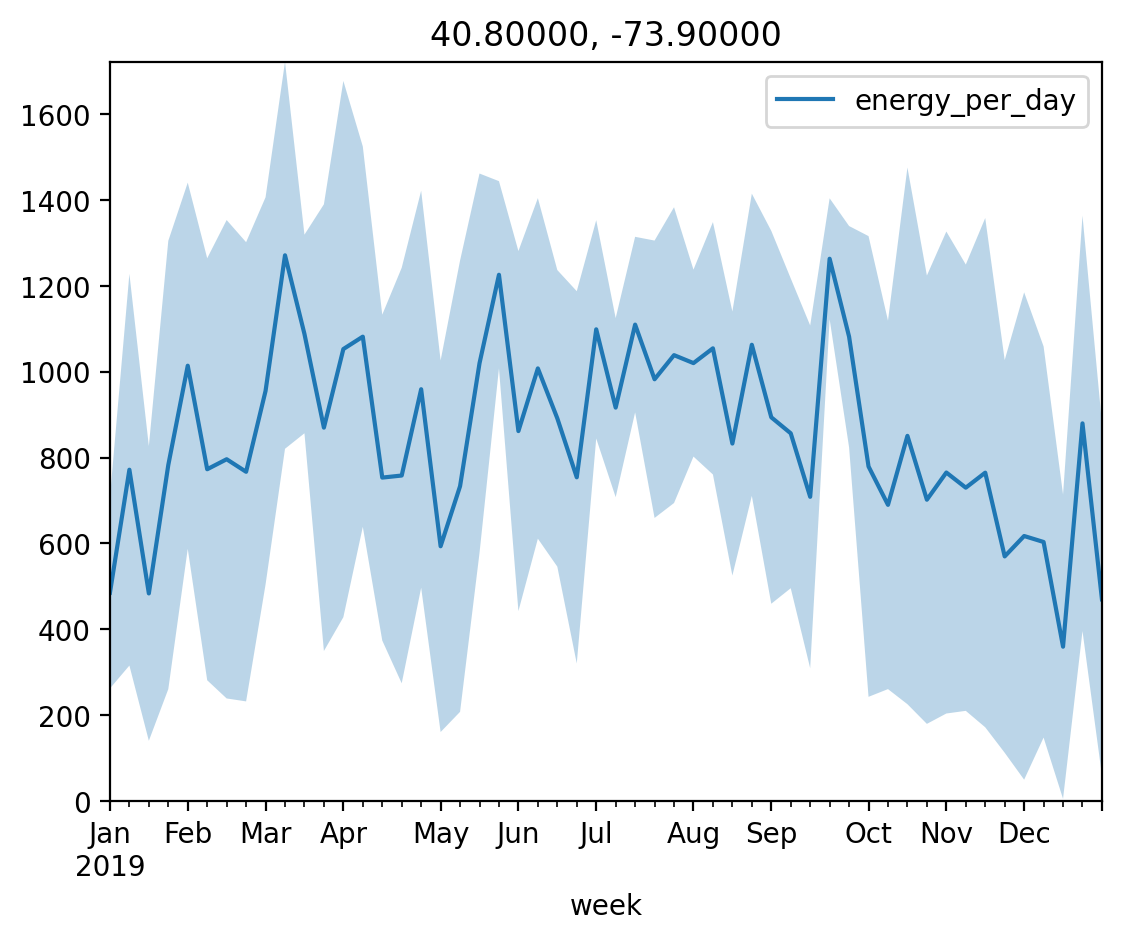

In [19]:
for lat, lon in [
    (lat_texas, lon_texas),
    (lat_wash, lon_wash),
    (lat_ny, lon_ny),
]:
    data_generation.solar.make_timeseries(lat, lon)

# End of notebook